# Spin Systems and the Microcanonical Ensemble



### Peter Onyisi
<img src="images/texas_logo.png" width="400" align="left"/>

In [129]:
# TACC: install if necessary
! pip3 install --user numba
INSTALL_PATH='/home/jupyter/mydata/jupyter_packages/lib/python3.6/site-packages'
import sys, os
if os.access(INSTALL_PATH, os.R_OK) and INSTALL_PATH not in sys.path:
    sys.path.insert(0, INSTALL_PATH)

In [2]:
# import Python packages
import numpy
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['animation.embed_limit'] = 50
import math
import tqdm.notebook
from IPython.display import HTML
from matplotlib import animation
# for binomial coefficients
import scipy.special
import random
import numba

Let's introduce a simple system that can demonstrate many features of statistical mechanics with the advantage of being discrete and having a finite number of possible states. This is a system of "spins" in an external magnetic field $\vec{B}$. We will discuss the idea of "spin" more when we talk about quantum mechanics; for now, just imagine we have particles that act as little magnets, which can either be _aligned_ or _antialigned_ with $\vec{B}$ (no intermediate angles are permitted). If the spin of the particle is aligned, it has an energy $-\mu B$, and if it is antialigned, it has an energy $+\mu B$ (here $\mu$ is the _magnetic dipole moment_ of the particle). This behavior is the same as the tendency of a bar magnet to align with the local magnetic field (e.g. how a magnetic compass works). Conventionally we imagine $\vec{B}$ to be pointing upward, so the aligned spins are "up" (&uarr;) and the antialigned spins are "down" (&darr;).

![Spin system](images/spin_system.png)

We can set up a system with a large number of such magnetic particles. If there are $N$ particles, of which $N_\uparrow$ are aligned, then the total energy of the system is 

$$E= -N_\uparrow\mu B + (N-N_\uparrow)\mu B = (N-2N_\uparrow)\mu B$$

and the _net magnetization_ of the system is 

$$ M = N_\uparrow \mu - (N-N_\uparrow) \mu = (2N_\uparrow - N)\mu = -E/B$$

We typically assume there are very weak interactions between the spins which allow them to exchange energy with each other, so a pair of particles can swap which one is spin up and which is spin down. (There are more complicated models in which the particles feel each other's magnetic fields, so they have a tendency to align with each other &mdash; emulating ferromagnetism &mdash; but we'll ignore that for the moment.)

In these models we can fully enumerate all possible states. If there are $N$ particles, then there are $2^N$ total possible states, and $\left(\begin{array}{c}N\\N_\uparrow\end{array}\right) = \frac{N!}{N_\uparrow ! (N-N_\uparrow)!}$ possible ways to have exactly $N_\uparrow$ up spins. If I specify the total number of spins $N$ and the energy $E$ then the accessible states are precisely the ones with 

$$ N_\uparrow = \frac{N - E/\mu B}{2} $$

If we know the number of particles and the total energy is kept fixed, the set of accessible states is called the _microcanonical ensemble_. The principle of indifference would lead us to assume the system has an equal probability of being in each of the accessible states.  For a general system (such as the ideal gas) the same idea applies: fixing the number of particles, the total energy, and overall system parameters (such as volume), gives a set of accessible states which is the microcanonical ensemble for that system.

We can use the microcanonical ensemble to probe energy exchange between systems. We can imagine taking a big system with $N$ particles and splitting it into two subsystems with $N_1$ and $N_2$ particles. When we consider the microcanonical ensemble for the big system, the total energy of the two subsystems $E_1 + E_2$ will remain constant, but the energies of each individual subsystem will not be constant. What can the microcanonical ensemble teach us about the behavior of $E_1$ and $E_2$?

![Spin system split into two](images/spin_system_split.png)

Note: we are going to be always assuming that $E_1$ and $E_2$ are negative &mdash; that is, most of the spins are aligned with the magnetic field, and we don't approach the 50% spin-down point. There is a technical reason for this; it is not possible to prepare a state with 50% or more anti-aligned spins (a "population inversion") through normal thermodynamic techniques.  (It's what makes lasers work, but it's not simple to do.)

The microcanonical ensemble, together with the principle of indifference, tells us that we should expect values of $E_1$ and $E_2$ (or, equivalently, the number of up spins in each subsystem, $N_{1\uparrow}$ and $N_{2\uparrow}$) that represent a "typical" state of the full system. We quantify this by determining the probability of seeing $(N_{1\uparrow}, N_{2\uparrow})$ relative to _all_ possible states of the combined system with $N_\uparrow = N_{1\uparrow} + N_{2\uparrow}$ up spins.

$$ P(N_{1\uparrow}, N_{2\uparrow}) = \frac{\textrm{number of states with }(N_{1\uparrow}, N_{2\uparrow})}{\textrm{number of states with }N_\uparrow} = \frac{\left(\begin{array}{c}N_1\\N_{1\uparrow}\end{array}\right)\left(\begin{array}{c}N_2\\N_{2\uparrow}\end{array}\right)}{\left(\begin{array}{c}N\\N_{1\uparrow}+N_{2\uparrow}\end{array}\right)}
% = \frac{\frac{N_1!}{N_{1\uparrow}!(N_1-N_{1\uparrow})!}\frac{N_2!}{N_{2\uparrow}!(N_2-N_{2\uparrow})!}}{\frac{N!}{(N_{1\uparrow} + N_{2\uparrow})!(N-N_{1\uparrow}-N_{2\uparrow})!}}
$$

<!-- Let's use Stirling's Formula to simplify this. The approximation tells us that

$$ \ln N! \approx N \ln N - N $$

(the $\frac{1}{2}\ln 2\pi N$ term is much smaller than the terms that are proportional to $N$ so we can ignore it here).

$$
\begin{align*}
\ln \left(\begin{array}{c}a\\b\end{array}\right) &= \ln \frac{a!}{b!(a-b)!} = \ln a! - \ln b! - \ln (a-b)!\\
&\approx (a \ln a - a) - (b \ln b - b) - ((a-b) \ln (a-b) - (a-b))\\
&=a \ln a - b \ln b - (a-b)\ln (a-b)\\
&=a \ln a - 
\end{align*}
$$ -->

<!-- We'll be dealing with very large numbers $N$, $N_1$, $N_2$, and so on. Using the fact that the binomial distribution with $p=0.5$ looks like a normal distribution:

$$ \left(\begin{array}{c}N\\k\end{array}\right) p^k (1-p)^{N-k} = B(k; N, p) \approx \mathcal{N}(k; Np, \sqrt{Np(1-p)}) = \frac{1}{\sqrt{2\pi Np(1-p)}}\exp(-(k-Np)^2/(2Np(1-p)) $$

means we can extract an approximation for $\left(\begin{array}{c}N\\k\end{array}\right) = 2^N B(k; N, 0.5)$:

$$ \left(\begin{array}{c}N\\k\end{array}\right) \approx \frac{2^N}{\sqrt{\pi N/2}}\exp(-2(k-N/2)^2/N) $$

So we can approximate $P(N_{1\uparrow}, N_{2\uparrow})$:

$$ \begin{align*}
P(N_{1\uparrow}, N_{2\uparrow}) &\approx 
\frac{
\frac{2^{N_1}}{\sqrt{\pi N_1/2}}\exp(-2(N_{1\uparrow}-N_1/2)^2/N_1)
\frac{2^{N_2}}{\sqrt{\pi N_2/2}}\exp(-2(N_{2\uparrow}-N_2/2)^2/N_2)
}
{\frac{2^{N}}{\sqrt{\pi N/2}}\exp(-2((N_{1\uparrow}+N_{2\uparrow})-N/2)^2/N)}\\
&= \sqrt{\frac{2N}{\pi N_1N_2}}\exp\left[-2\left(
\frac{(N_{1\uparrow}-N_1/2)^2}{N_1}+\frac{(N_{2\uparrow}-N_2/2)^2}{N_2}-\frac{((N_{1\uparrow}+N_{2\uparrow})-N/2)^2}{N}
\right)\right]
\end{align*} $$

Since $N_1$, $N_2$, $N$, and $N_{1\uparrow}+N_{2\uparrow}$ are considered to be constant (the last is constant because we are keeping the total energy fixed), we can remove a lot of constant terms:

$$ P(N_{1\uparrow}, N_{2\uparrow}) \propto \exp\left[-2\left(
\frac{(N_{1\uparrow}-N_1/2)^2}{N_1}+\frac{(N_{2\uparrow}-N_2/2)^2}{N_2}\right)\right] $$ -->


Denote the number of possible configurations of system 1 with energy $E_1$ as $\Omega_1(E_1)$, the number of configurations of system 2 with energy 2 as $\Omega_2(E_2)$, and the number of configurations of the combined system with energy $E$ as $\Omega(E)$. In general we have

$$ P(E_1, E_2) = \frac{\Omega_1(E_1)\Omega_2(E_2)}{\Omega(E_1+E_2)} \propto \Omega_1(E_1)\Omega_2(E_2) $$

since $E_1 + E_2 = E$ is constant. The most likely configuration is then the one with the highest value of $P$. This will also be the configuration with the highest value of $\ln P$:

$$ \ln P(E_1, E_2) = \ln \Omega_1(E_1) + \ln \Omega_2(E_2) + \mathrm{constant}$$

We can find $E_1$ that maximizes $P$ by setting $d \ln P/d E_1 = 0$:

$$ 
\begin{align*}
0 =\frac{d \ln P}{d E_1} &= \frac{d \ln \Omega_1}{d E_1} + \frac{d \ln \Omega_2}{d E_1}\\
&= \frac{\partial \ln \Omega_1}{\partial E_1} + \frac{\partial \ln \Omega_2}{\partial E_2} \frac{d E_2}{d E_1}\\
&= \frac{\partial \ln \Omega_1}{\partial E_1} - \frac{\partial \ln \Omega_2}{\partial E_2}\\
\frac{\partial \ln \Omega_1}{\partial E_1} &= \frac{\partial \ln \Omega_2}{\partial E_2}
\end{align*}
$$

So we would expect, in general, to see the systems in a configuration where $\partial \ln \Omega_1 /\partial E_1 = \partial \ln \Omega_2 /\partial E_2$.


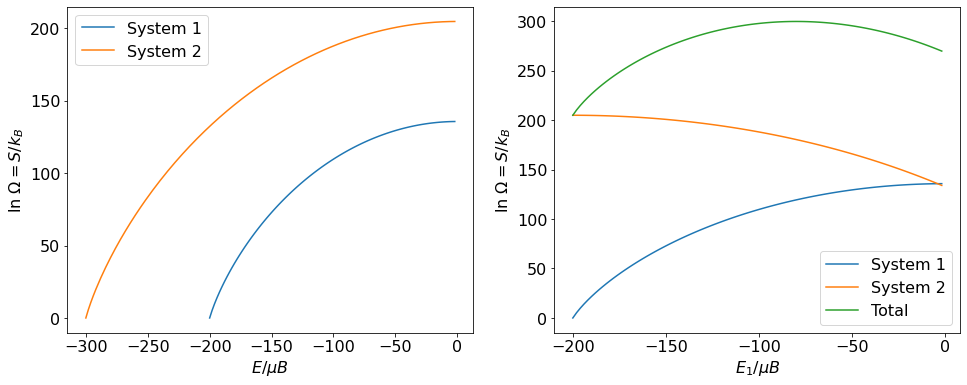

In [9]:
# Plot entropy vs energy for two subsystems and the total
N_1 = 200
N_2 = 300

# E is in units of mu B
def omega(N, E):
    Nup = (N - E)/2
    return scipy.special.binom(N, Nup)

# evaluate temperature by taking numerical derivative of ln omega
def temp(N, E):
    Tinv = (numpy.log(omega(N,E+2))-numpy.log(omega(N,E-2)))/4
    return 1/Tinv

# energy steps by 2
E1 = numpy.arange(-N_1, 0, 2)
E2 = numpy.arange(-N_2, 0, 2)
Etotal=-200

plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(E1, numpy.log(omega(N_1, E1)), label='System 1')
plt.plot(E2, numpy.log(omega(N_2, E2)), label='System 2')
plt.xlabel('$E/\mu B$')
plt.ylabel('$\ln\ \Omega = S/k_B$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(E1, numpy.log(omega(N_1, E1)), label='System 1')
plt.plot(E1, numpy.log(omega(N_2, Etotal-E1)), label='System 2')
plt.plot(E1, numpy.log(omega(N_1, E1)) + numpy.log(omega(N_2, Etotal-E1)), label='Total ($E_\textrm{total}=-200$)')
plt.xlabel('$E_1/\mu B$')
plt.ylabel('$\ln\ \Omega = S/k_B$')
plt.legend()
plt.show()


Let's unpack this a bit. Suppose we start with $\partial \ln \Omega_1 /\partial E_1 < \partial \ln \Omega_2 /\partial E_2$; this corresponds to a certain amount of energy $\tilde E_1$ in system 1 and energy $\tilde E_2$ in system 2. Since the total energy $E_1+E_2$ is constant, all I can do is to remove a little bit of energy $\Delta E$ from system 1 and add it to system 2 (or vice versa). Since $\partial \ln \Omega_1 /\partial E_1$ and $\partial \ln \Omega_2 /\partial E_2$ are positive, the consequence of moving energy from system 1 to system 2 is to reduce the number of potential states system 1 can achieve, and to increase the number of potential states of system 2. The change in the total number of accessible states, or equivalently $\ln (\Omega_1 \Omega_2)$, is given by

$$ 
\begin{align*}
\Delta[\ln \Omega_1 \Omega_2] = \Delta[\ln \Omega_1 + \ln \Omega_2] &= \frac{\partial \ln \Omega_1}{\partial E_1}(-\Delta E) + \frac{\partial \ln \Omega_2}{\partial E_2}(+\Delta E)\\
&= (\Delta E)\left[\frac{\partial \ln \Omega_2}{\partial E_2}-\frac{\partial \ln \Omega_1}{\partial E_1}\right]
\end{align*}
$$ 

If $\partial \ln \Omega_1 /\partial E_1 < \partial \ln \Omega_2 /\partial E_2$ then we will _gain_ in the number of accessible states if we remove energy from system 1 and move it to system 2, and have a _reduction_ if energy is moved from system 2 to system 1. This means we are not in the equilibrium situation, and we would expect the system to evolve towards equilibrium. Since we expect the system to wind up with the distribution of energy that gives us the most accessible states, we would expect a transfer of energy from system 1 to system 2 (and not, in general, the other way around). So: energy will transfer from a system with lower $\partial \ln \Omega/\partial E$ to a system with higher $\partial \ln \Omega/\partial E$.  On the other hand, if two systems have the same $\partial \ln \Omega/\partial E$, transferring a small amount of energy causes the total number of accessible states to stay about the same, so small amounts of energy can transfer in either direction.

This sounds like temperature, except for the direction that energy flows (from lower $\partial \ln \Omega/\partial E$ to higher $\partial \ln \Omega/\partial E$).  We can define the _thermodynamic temperature_ as the reciprocal of the partial derivative:

$$ \frac{1}{T} = k_B \frac{\partial \ln \Omega}{\partial E} = \frac{\partial [k_B \ln \Omega]}{\partial E} = \frac{\partial S}{\partial E}$$

where we have put in the Boltzmann constant $k_B$ to make the units come out right.  It's not exactly obvious here that this is going to be the thing that we call "temperature" in the ideal gas law, for example, though it turns out to be. We also introduce the symbol $S = k_B \ln \Omega$ called the *entropy*, one of the most fundamental concepts in statistical mechanics, with SI units J K<sup>-1</sup>. 

The entropy of a system is a measure of the number of states available to the system. Because, probabilistically, systems seek to be in macroscopic states which maximize the available number of microscopic states, probabilistically we expect that $S$, which increases with the number of available states, will be maximized. If two systems at different temperature are put into contact, energy will flow in such a way that the entropy of the combined pair of systems is maximized, which will happen when the two systems reach the same temperature.

E_1 of max entropy of combined system: -80
E_1 of equal sharing: -80.0


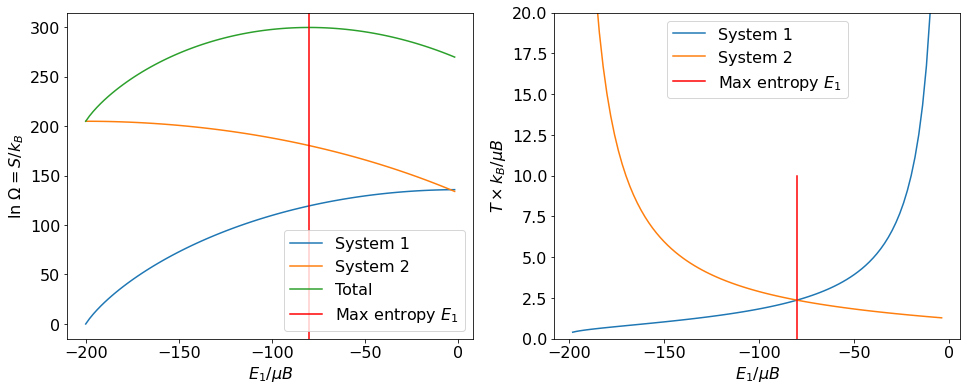

In [121]:
# Plot entropy vs energy for two subsystems and the total
N_1 = 200
N_2 = 300
N = N_1+N_2

# E is in units of mu B
def omega(N, E):
    Nup = (N - E)/2
    return scipy.special.binom(N, Nup)

# evaluate temperature by taking numerical derivative of ln omega
def temp(N, E):
    Tinv = (numpy.log(omega(N,E+2))-numpy.log(omega(N,E-2)))/4
    return 1/Tinv

# energy steps by 2
E1 = numpy.arange(-N_1, 0, 2)
Etotal = -200

E_max_S = E1[numpy.argmax(numpy.log(omega(N_1, E1)) + numpy.log(omega(N_2, Etotal-E1)))]
print('E_1 of max entropy of combined system:', E_max_S)
print('E_1 of equal sharing:', Etotal*N_1/(N_1+N_2))

plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(E1, numpy.log(omega(N_1, E1)), label='System 1')
plt.plot(E1, numpy.log(omega(N_2, Etotal-E1)), label='System 2')
plt.plot(E1, numpy.log(omega(N_1, E1)) + numpy.log(omega(N_2, Etotal-E1)), label='Total')
plt.axvline(E_max_S, color='r', label='Max entropy $E_1$')
plt.xlabel('$E_1/\mu B$')
plt.ylabel('$\ln\ \Omega = S/k_B$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(E1[1:-1], temp(N_1, E1[1:-1]), label='System 1')
plt.plot(E1[1:-1], temp(N_2, Etotal-E1[1:-1]), label='System 2')
plt.xlabel('$E_1/\mu B$')
plt.ylabel(r'$T \times k_B/\mu B$')
plt.axvline(E_max_S, ymax=0.5, color='r', label='Max entropy $E_1$')
plt.ylim(0,20)
plt.legend()
plt.show()

In [122]:
# Run a system simulation
# update rule: if spins n and n+1 are different, 50% chance to exchange them
# treat spins 0 and N-1 as adjacent
# -1 = antialigned, 1 = aligned

@numba.jit
def update(spins):
    for i in range(len(spins)):
        iplus1 = i+1 if i < len(spins)-1 else 0
        if spins[i] != spins[iplus1]:
            if random.random() < 0.5:
                spins[i], spins[iplus1] = spins[iplus1], spins[i]

In [123]:
# initialze first (N-Etotal)/2 spins to aligned, rest to antialigned
spins = -numpy.ones(N)
spins[:(N-Etotal)//2] = 1

NFRAMES = 200000
E1_history = []
S1_history = []
S2_history = []
S_history = []
for i in range(NFRAMES):
    this_E1 = -numpy.sum(spins[:N_1])
    E1_history.append(this_E1)
    S1_history.append(numpy.log(omega(N_1, this_E1)))
    S2_history.append(numpy.log(omega(N_2, Etotal-this_E1)))
    S_history.append(numpy.log(omega(N_1, this_E1))+numpy.log(omega(N_2, Etotal-this_E1)))
    update(spins)

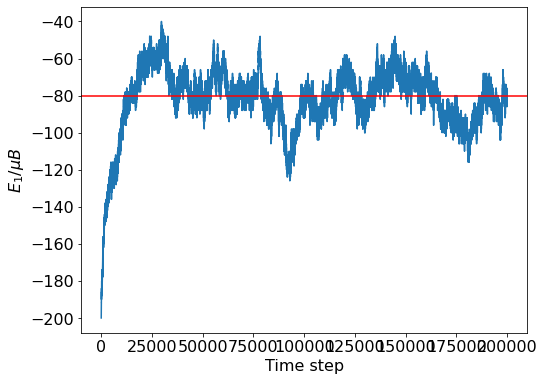

In [124]:
# fraction of energy in system 1
plt.plot(range(NFRAMES), E1_history)
plt.axhline(E_max_S, color='r')
plt.xlabel('Time step')
plt.ylabel('$E_1/\mu B$')
plt.show()

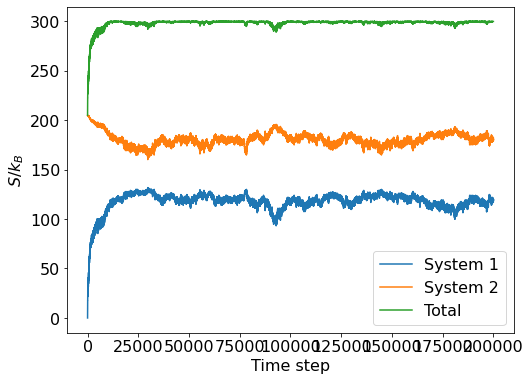

In [125]:
plt.plot(range(NFRAMES), S1_history, label='System 1')
plt.plot(range(NFRAMES), S2_history, label='System 2')
plt.plot(range(NFRAMES), S_history, label='Total')
plt.xlabel('Time step')
plt.ylabel('$S/k_B$')
plt.legend()
plt.show()

### Microcanonical ensemble for an ideal gas
For completeness, let's discuss how we can count states for an ideal gas of $N$ (distinguishable) particles in a box of volume V.  We can specify the state of the gas by saying where every particle is, and what the velocity of the particle is. Of course both the position and momenta are continuous variables, so there are technically an infinite number of possible states, but what we shall do is assume there is some (very small) minimum chunk size of position and momentum variables. (Quantum mechanics justifies this.) As long as we keep this minimum chunk size fixed, our counting technique will be consistent.  We should be able to choose the position and the momentum independently so the counting of the available states is the product of the number of available position and momentum states.

**For position**: the energy of the gas does not depend on the position of the particles, so the constraint that the total energy is constant does not affect the counting of position states. The particles can be anywhere in the volume $V$; therefore the number of states for any individual particle is $V/\delta V$, where $\delta V$ is the minimum chunk size. The total number of position states is therefore $(V/\delta V)^N$.

**For momentum**: the energy of the gas _does_ depend on the momenta of the particles. The kinetic energy of any particle is $\frac{1}{2}mv^2 = p^2/2m$, so the microcanonical ensemble restricts us to momenta such that

$$ \sum_{i \in \textrm{particles}} \frac{p_i^2}{2m_i} = E $$

Assuming all the particles have the same mass $m$ then this just says $\sum_{i=1}^{N} p_i^2 = 2mE$. Each momentum vector $\vec{p}_i$ is a three-dimensional object, so we can view this equation as defining a "hypersphere" in a $3N$-dimensional space (i.e., if you mush all the $\vec{p}_i$ into a single vector with $3N$ components $[p_{1x}, p_{1y}, p_{1z}, p_{2x}, \ldots, p_{Nx}, p_{Ny}, p_{Nz}]$, then the square of the length of that vector is required to be $2mE$, but it can otherwise be pointing in any direction). 

![Density of states image from Judith McGovern, Manchester](images/density_of_states.gif)

So the number of allowed momentum states is proportional to the "surface area" of this sphere. This is a known result (the sort of thing one looks up in a book, or Wikipedia):

$$ A_{3N}(r) = r^{3N-1} \frac{2\pi^{3N/2}}{\Gamma(3N/2)} $$

where $r$ is the radius of the sphere and $\Gamma(x)$ is a special function which is the continuous version of the factorial ($\Gamma(n) = (n-1)!$).  Here $r = \sqrt{2 m E}$.

One complication arises: since this is a continuous system, what we are really interested in is the number of states _very close to_ energy $E$, i.e. the number of states in the range $[E, E+dE]$ is $\Omega(E) dE$. The area computed above actually gives us the number of states close to _total momentum magnitude_ $\sqrt{2mE}$, so is counting the number of states in the range $[\sqrt{2mE}, \sqrt{2mE}+dp]$. To convert the two, we need to convert a $dE$ to a $dp$, which we can do by multiplying by $dp/dE$:

$$ \frac{dp}{dE} = \frac{d}{dE} \sqrt{2mE} = \sqrt{\frac{m}{2E}} $$

Putting these together, the number of momentum states is

$$ \begin{align*} &\frac{1}{\delta P^{N}} (2mE)^{(3N-1)/2} \frac{2\pi^{3N/2}}{\Gamma(3N/2)} \sqrt{\frac{m}{2E}} \\
&= \frac{1}{\delta P^{N}} \frac{(2mE)^{3N/2}}{2E} \frac{2\pi^{3N/2}}{\Gamma(3N/2)}\end{align*} $$

where $\delta P$ is the chunk size of momentum for each particle, with the same motivation as $\delta V$ above.

Finally, multiplying the position and momentum terms:

$$ \Omega(E) = \frac{1}{(\delta V\delta P)^{N}} V^N \frac{(2mE)^{3N/2}}{E} \frac{2\pi^{3N/2}}{\Gamma(3N/2)} = \frac{1}{h^{3N}} V^N \frac{(2mE)^{3N/2}}{E} \frac{2\pi^{3N/2}}{\Gamma(3N/2)} $$

where we introduce the constant $h$ such that $h^3 = \delta V \delta P$.

One further complication: here we have assumed that every single gas particle is distinguishable.  But physically there is no difference between states that differ just by the index labeling of which particle is which. Considering such states to be distinct leads to the paradoxical behavior that one could reduce the total entropy of a gas in a box by inserting a thin impermeable membrane between two halves of the box (since this traps specific particles on specific sides of the membrane). This is called the *Gibbs paradox*. We resolve it by considering all configurations that differ just by relabeling particles to be identical &mdash; this means we divide $\Omega$ from above by $N!$:

$$ \tilde \Omega(E) = \frac{1}{h^{3N}} \frac{V^N}{N!} \frac{(2mE)^{3N/2}}{E} \frac{2\pi^{3N/2}}{\Gamma(3N/2)} $$

Finally we can evaluate $S = k_B \ln \tilde \Omega$ with the help of Stirling's Formula (here in the form $\ln \Gamma(x) \approx x \ln x - x$) and throwing away terms that do not depend on $N$:

$$ S = k_B \ln \tilde \Omega = k_B N\left\{\ln \left[\frac{V}{N}\left(\frac{4\pi m E}{3h^2 N}\right)^{3/2}\right] + \frac{5}{2}\right\}$$

(whew!) which is called the *Sackur-Tetrode equation*.

Note that for fixed $V$ and $N$, $S = k_B N \ln E^{3/2} + \textrm{constant}$, which means that

$$ T = \left(\frac{\partial S}{\partial E}\right)^{-1} = \left(k_B N \frac{\partial}{\partial E} \left[\frac{3}{2}\ln E\right]\right)^{-1} = \left(\frac{3}{2} \frac{k_B N}{E}\right)^{-1} = \frac{2E}{3 k_B N} $$

rearranging, 

$$ E = \frac{3}{2} N k_B T$$

This is the total energy of the system, so the _average energy per particle_ is this divided by $N$, or $\frac{3}{2} k_B T$, exactly as derived in the kinetic theory of gases!

For 1 mole of nitrogen at standard temperature and pressure (273 K, 101.3 kPa, 22.4 liters, molecular mass $4.65 \times 10^{-26}$ kg), the logarithmic term of the Sackur-Tetrode equation evaluates to

In [128]:
V = 22.4e-3 # 22.4 liters in m^3
N = 6.022e23 # Avogadro's number
m = 4.65e-26 # mass of molecule in kg
kB = 1.380e-23 # Boltzmann's constant in J/K
T = 273 # in K
E = (3/2)*kB*T*N # total energy of gas, assuming 3/2 kT per molecule
h = 6.626e-34 # Planck's constant
math.log((V/N)*(4*math.pi*m*E/(3*h**2*N))**(3/2))

15.35654972019748

so it's more important than the 2.5 from the constant term, but the two become comparable at small $E$.